# Pima Indians Diabetes Database
https://www.kaggle.com/uciml/pima-indians-diabetes-database

___

In [314]:
# importer les librairies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [315]:
# importer la base de données
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [316]:
# vérifier les valeurs null
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [317]:
# voir la description du dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [318]:
# voir les informations sur le dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


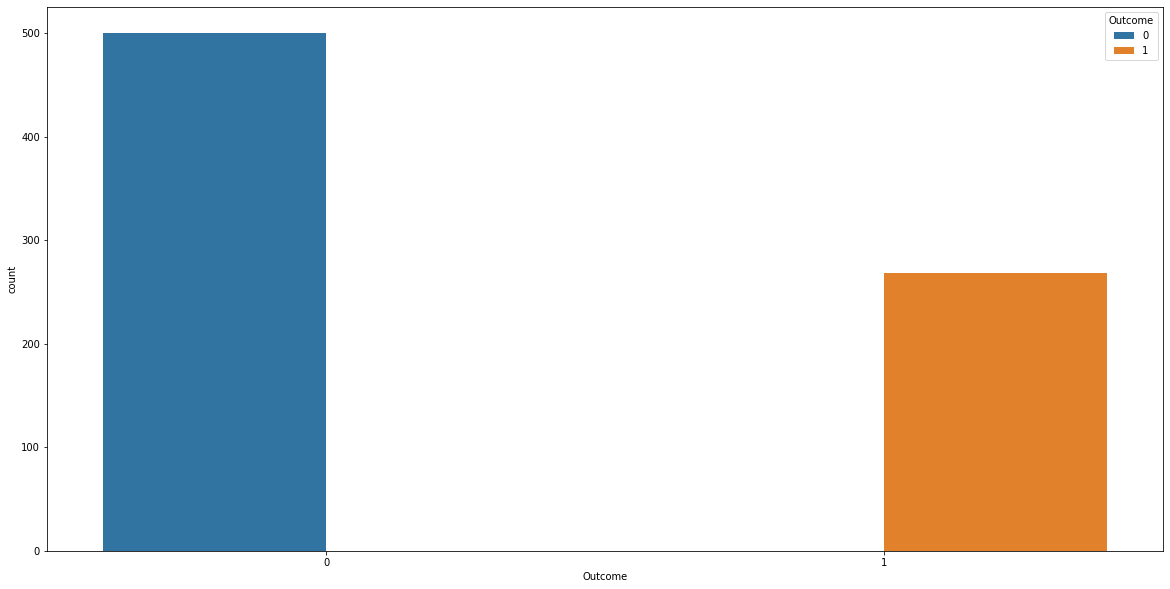

In [490]:
#Visuel sur la variable 'Outcome' (diabétique=1 ; NON diabétiques=0)
sns.countplot(df['Outcome'], hue=df["Outcome"])

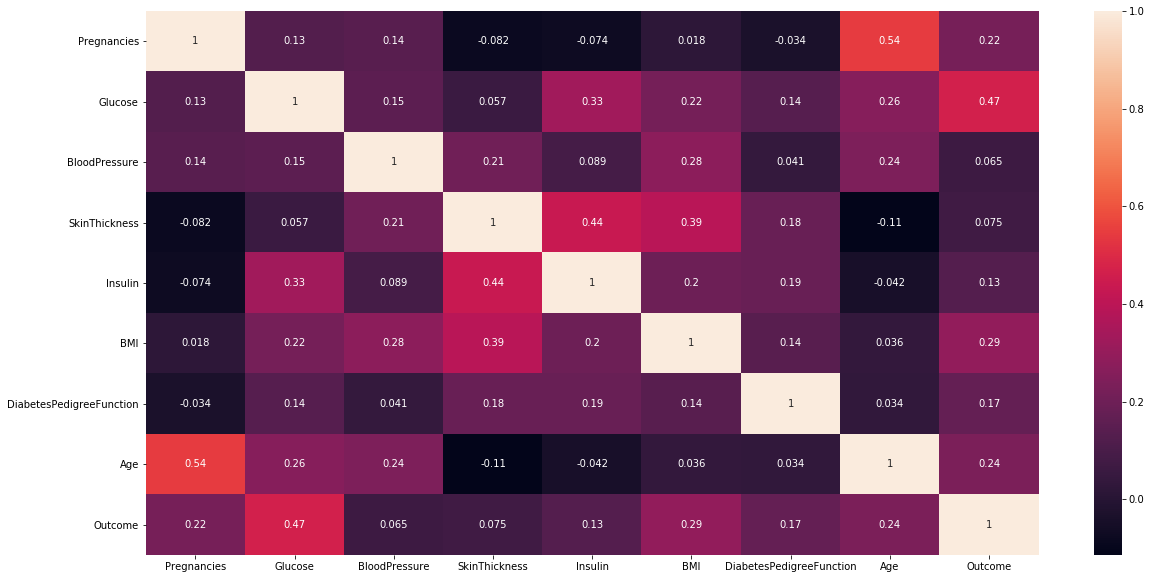

In [320]:
# Création d'une corrélation entre les différents features
plt.figure(figsize=(20,10))
sns.heatmap (df.corr(), annot = True)

In [321]:
#Recherche des valeurs 0 dans les différentes colonnes
count = 0
while (count <= len(df.columns)-2):
    print("Number of {0} in rows " + df.columns[count],
    format(len(df.loc[df.iloc[:,count]== 0]))) 
    count = count + 1
print("Total number of rows: {0}", format(len(df)))   

Number of {0} in rows Pregnancies 111
Number of {0} in rows Glucose 5
Number of {0} in rows BloodPressure 35
Number of {0} in rows SkinThickness 227
Number of {0} in rows Insulin 374
Number of {0} in rows BMI 11
Number of {0} in rows DiabetesPedigreeFunction 0
Number of {0} in rows Age 0
Total number of rows: {0} 768


_____

#### <center>Etude en supprimant les valeurs à 0 et par la médiane</center>

In [493]:
df_clean = df.copy()
df_median = df.copy()
col = ["BMI", "Glucose", "SkinThickness", "Insulin"]
for i in col :
    df_clean = df_clean[df_clean[i] != 0] #non égale 0
    df_median[i]  =  df_median[i].replace(to_replace = 0,  value = df_median[i].median())
print(df_clean , df_median)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
13             1      189             60             23      846  30.1   
..           ...      ...            ...            ...      ...   ...   
753            0      181             88             44      510  43.3   
755            1      128             88             39      110  36.5   
760            2       88             58             26       16  28.4   
763           10      101             76             48      180  32.9   
765            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
3                       0.167   21        0  
4                  

In [323]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


______

#### <center>Visualisation sur df_clean</center>

In [324]:
columns = ["Pregnancies",  "Glucose",  "BloodPressure",  "SkinThickness",  "Insulin", "BMI", "DiabetesPedigreeFunction",  "Age"]
def tripleviz(dataframe):
    for col in dataframe[columns]:   


        mu = dataframe[col].mean()
        median = np.median(dataframe[col])
        sigma = dataframe[col].std()
        name = dataframe[col].name

        fig = plt.figure()

        fig.suptitle('Visualisation et analyse de la colonne '+ name , fontsize=14, fontweight='bold')

        ax = fig.add_subplot(133)
        fig.subplots_adjust(top=0.85)
        ax.text(2, 8, 'Les chiffres clés', style='italic',
                bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})


        ax.text(2, 6, r'$\mu=%.2f$' % (mu, ), fontsize=15)
        ax.text(2, 4, r'$\mathrm{median}=%.2f$' % (median, ), fontsize=15)
        ax.text(2, 2, r'$\sigma=%.2f$' % (sigma, ), fontsize=15)

        ax.axis([0, 10, 0, 10])



        plt.subplot(131), sns.distplot(dataframe[col])
        plt.subplot(132), dataframe[col].plot.box(figsize=(16,5))




        plt.show()

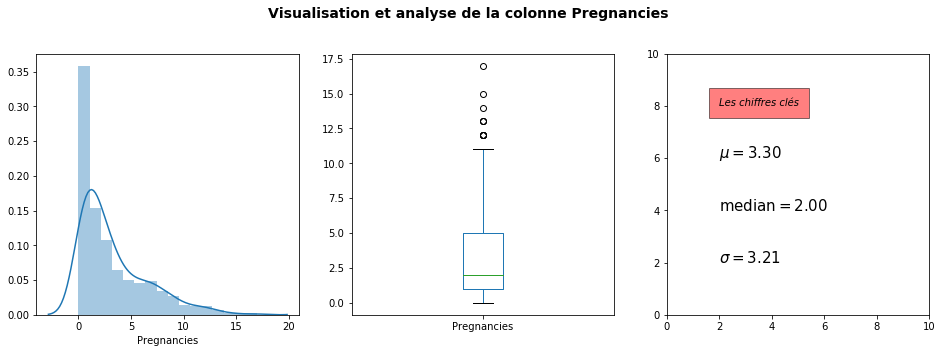

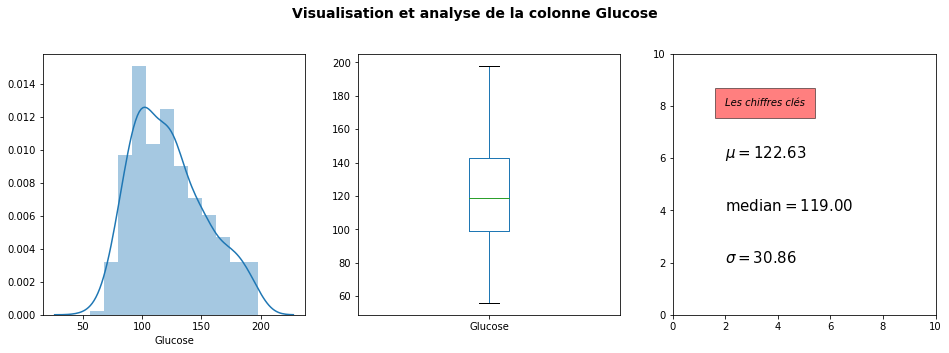

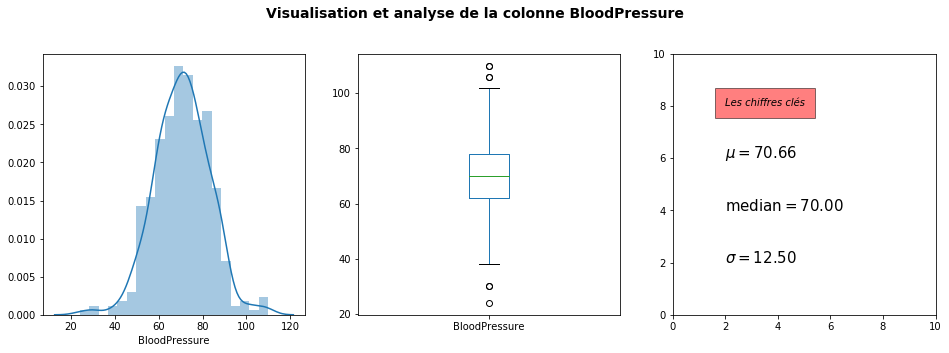

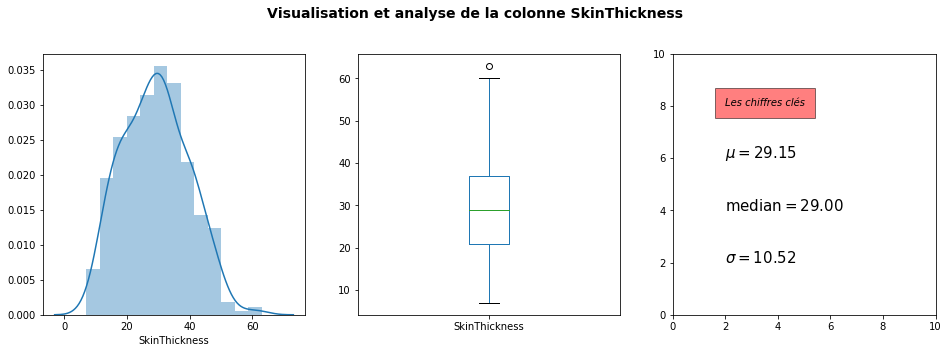

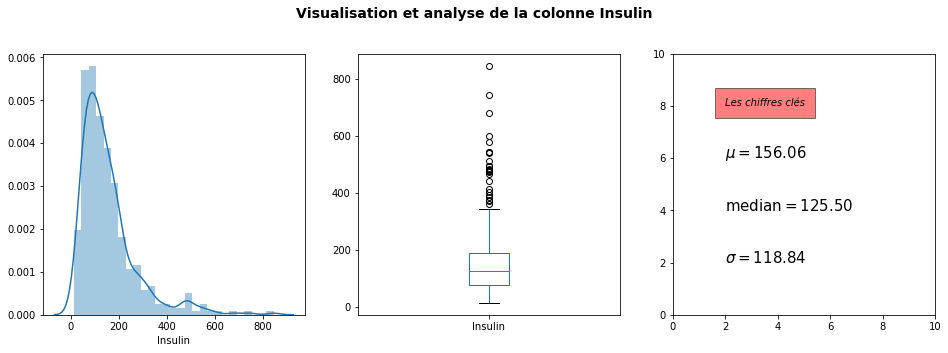

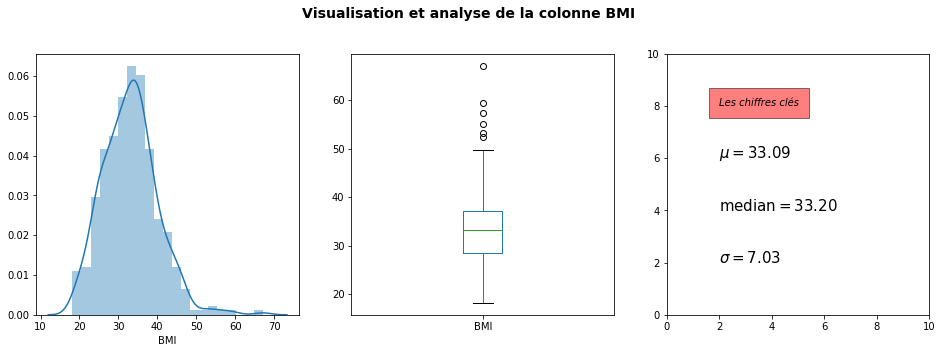

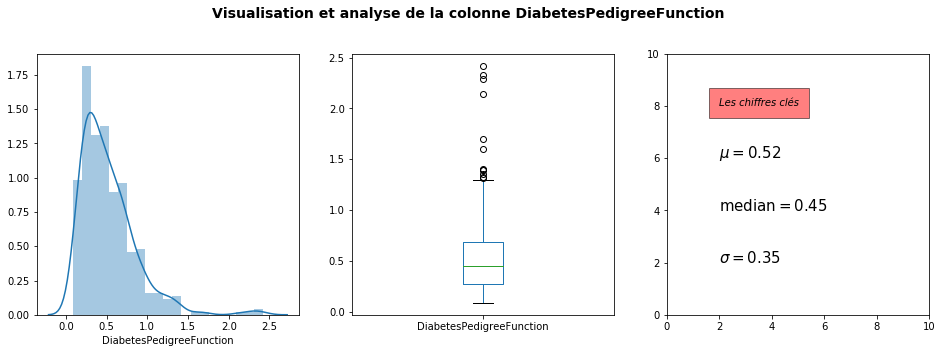

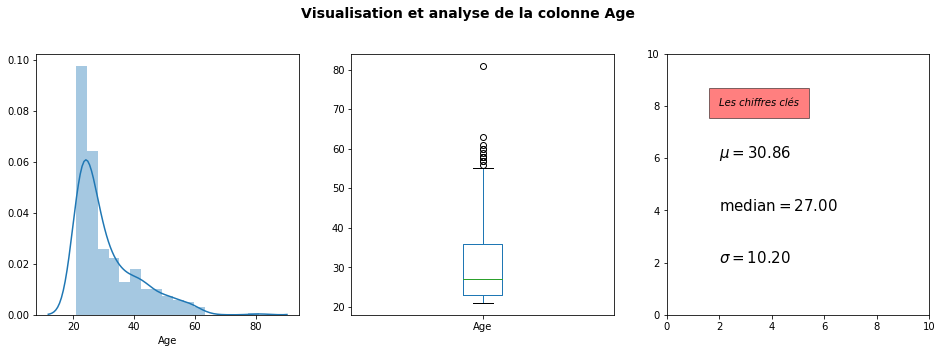

In [325]:
tripleviz(df_clean)

In [326]:
def viz_output(dataframe):


    df_positif = dataframe[dataframe['Outcome']==1]
    df_negatif = dataframe[dataframe['Outcome']==0]

    for col in df_clean :
        plt.figure()
        sns.distplot(df_positif[col], label='positif')
        sns.distplot(df_negatif[col], label='negatif')
        plt.legend()

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


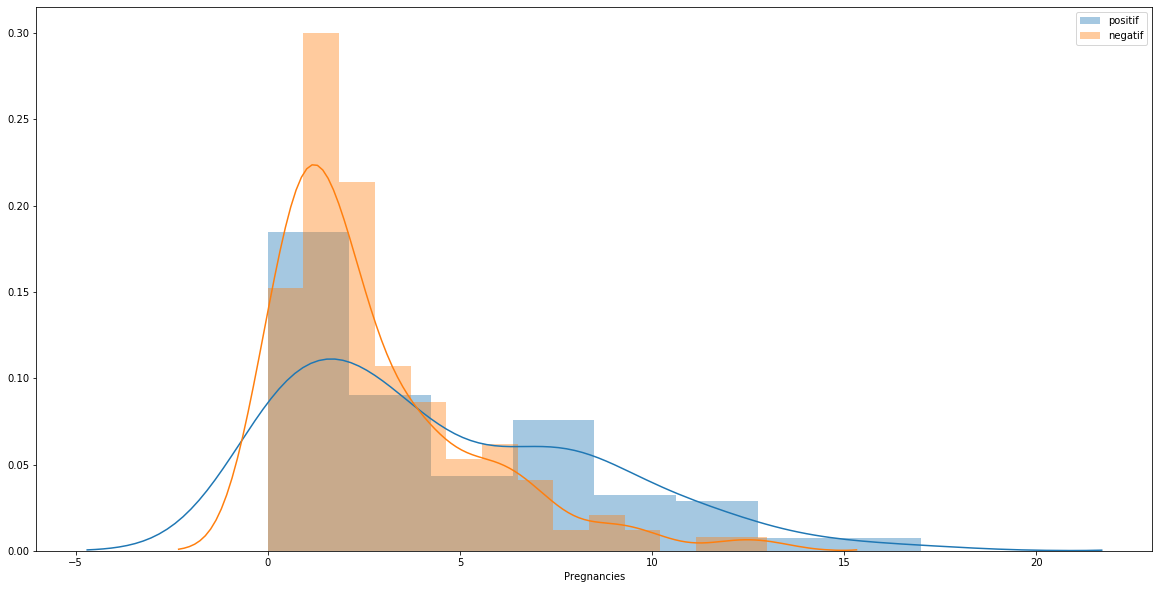

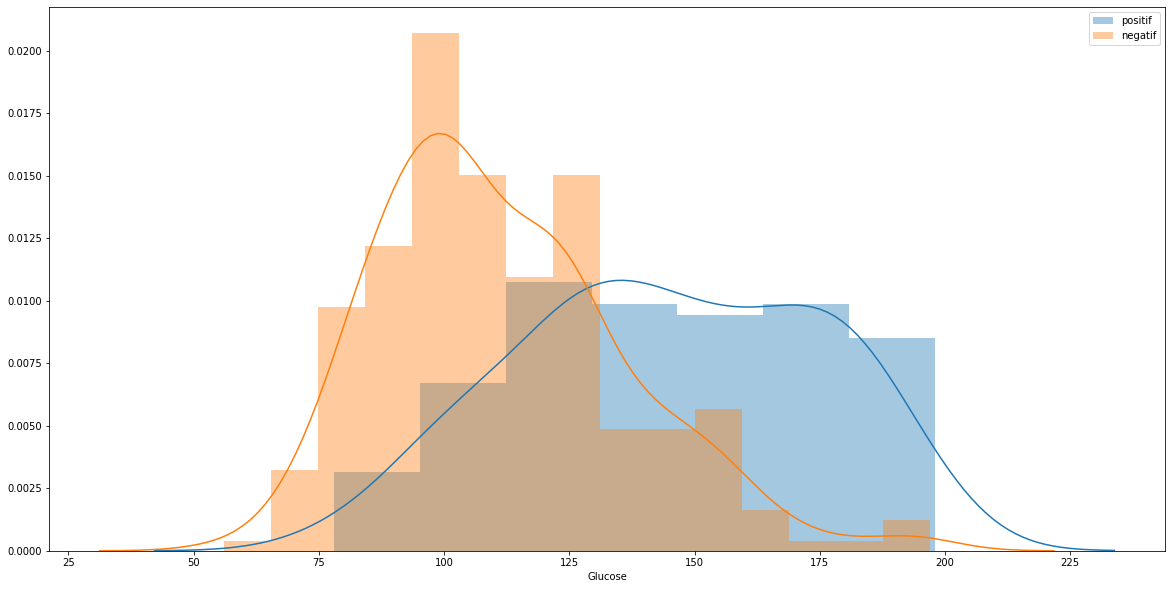

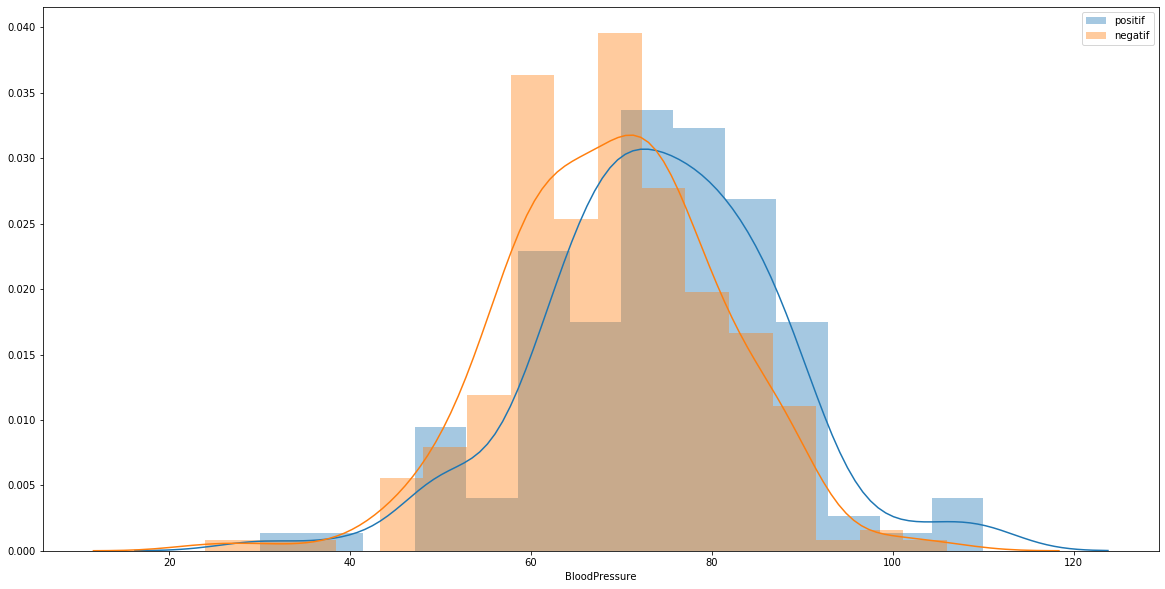

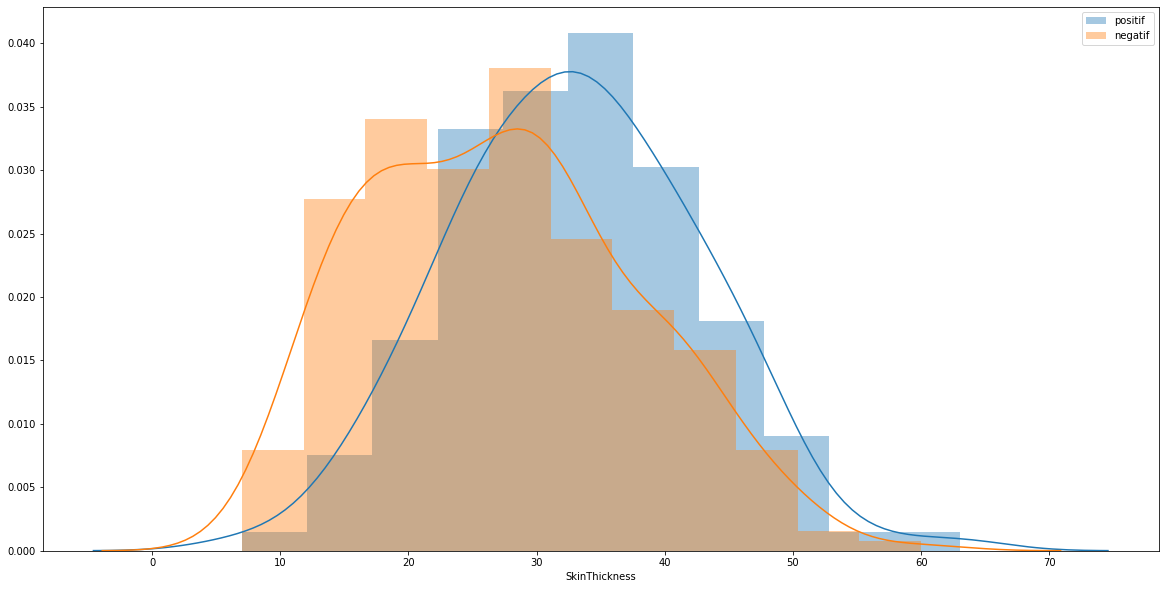

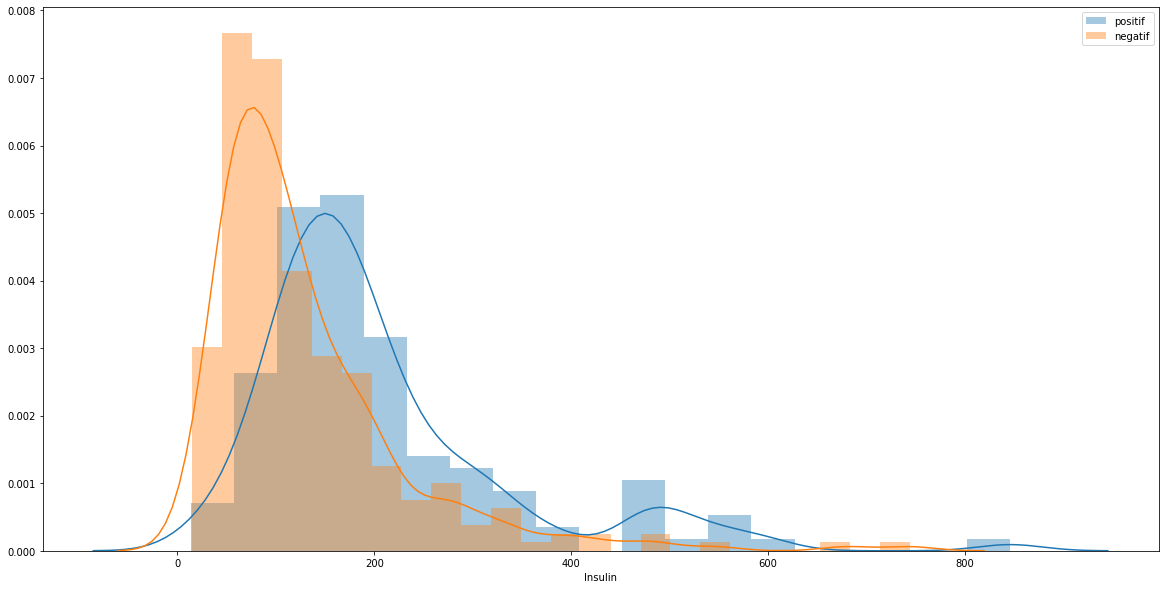

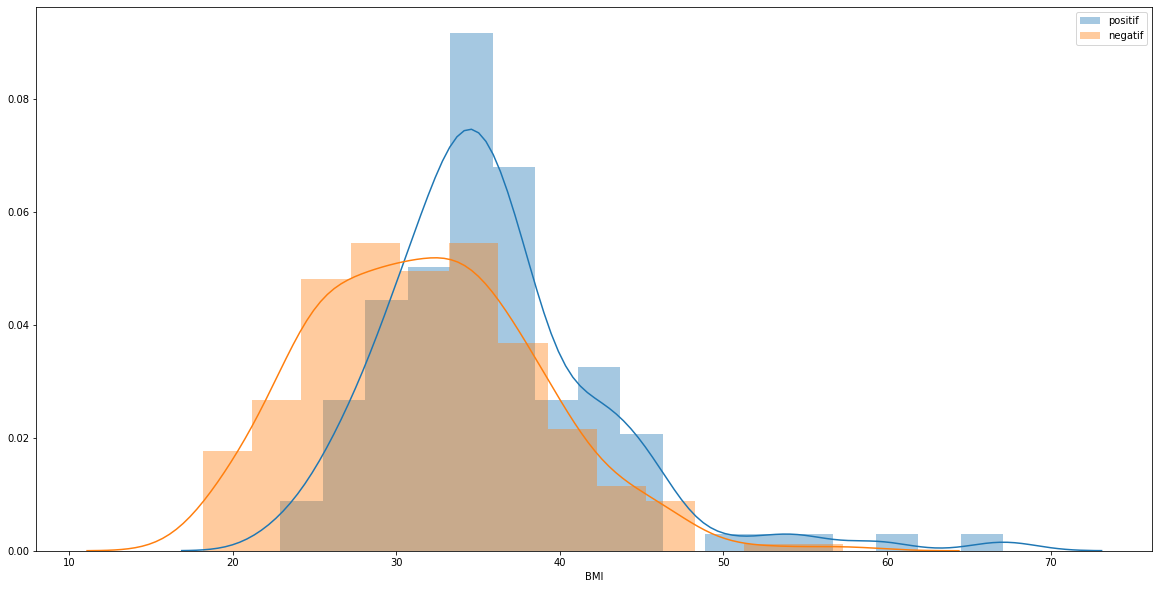

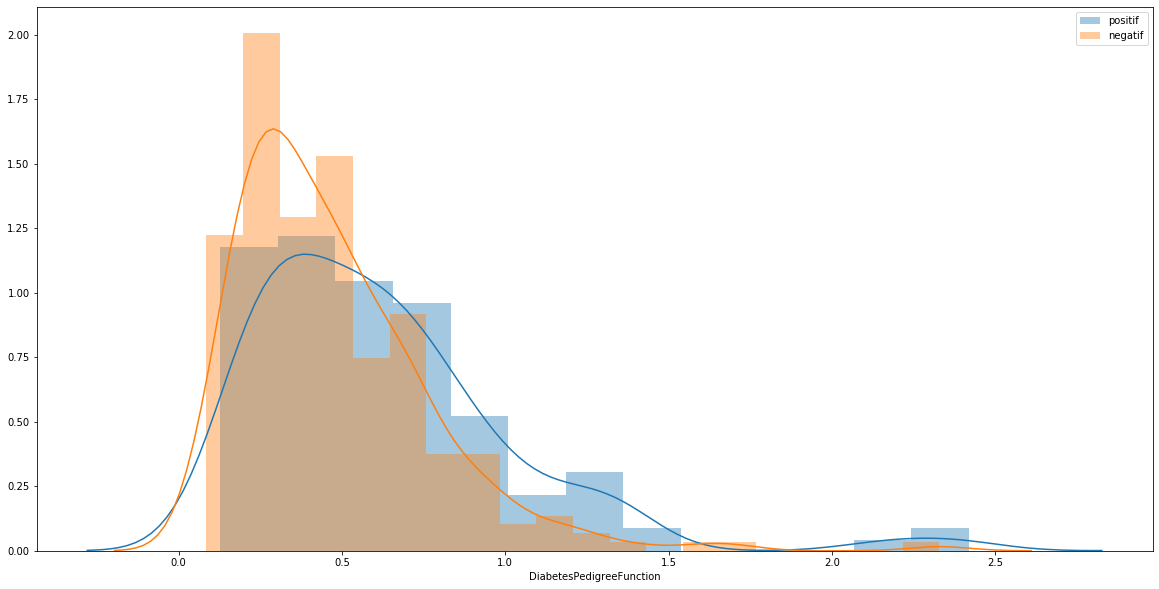

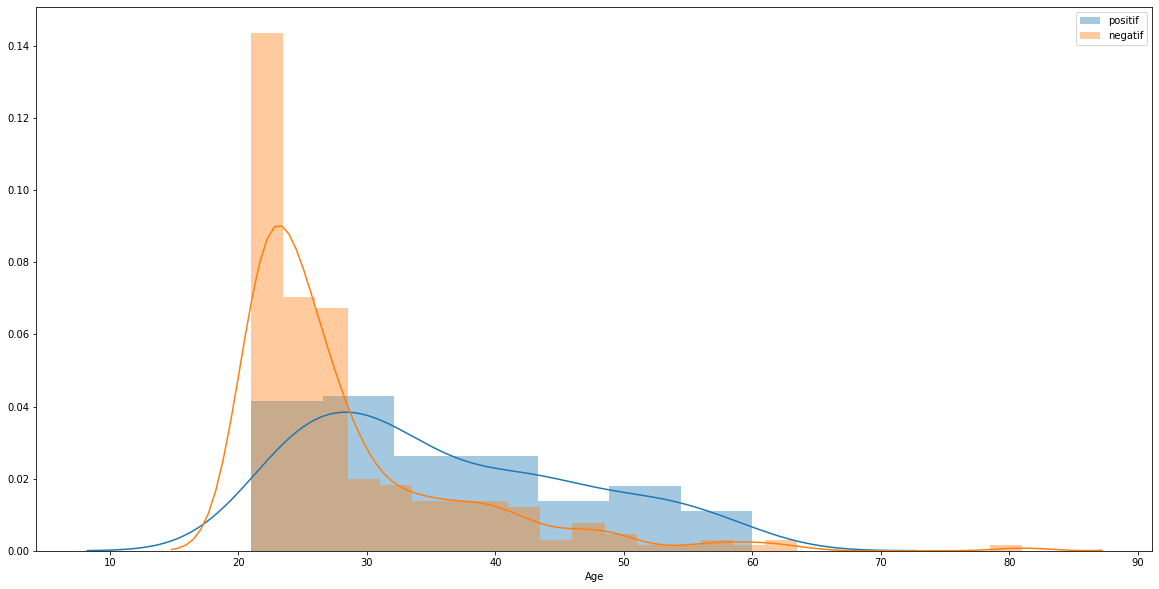

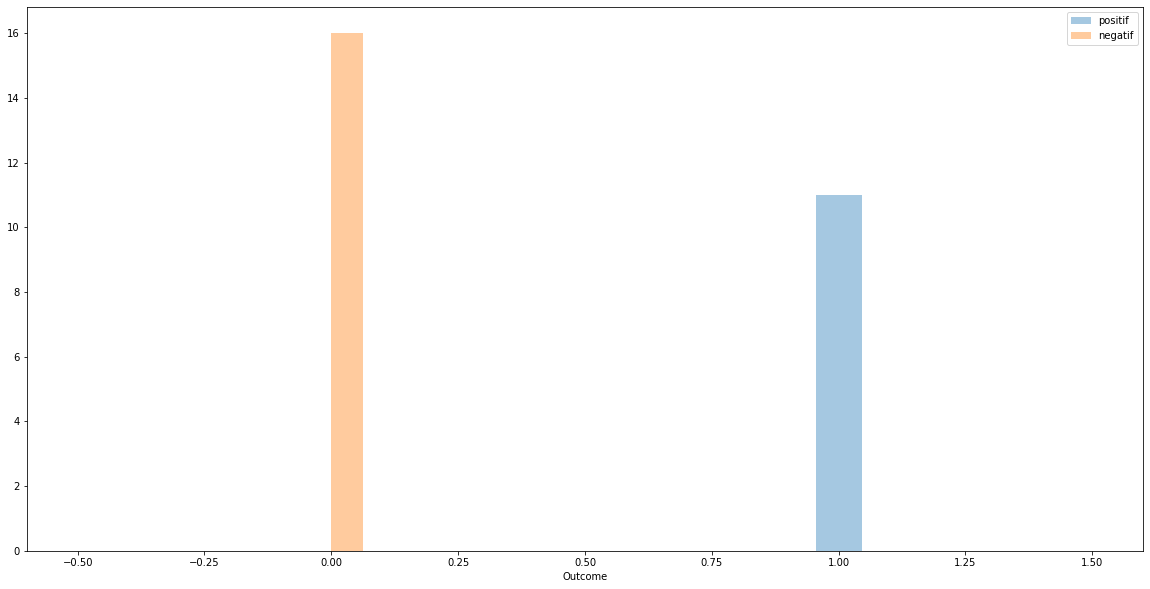

In [327]:
viz_output(df_clean)

(<matplotlib.axes._subplots.AxesSubplot at 0x1992a2321c8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1992a2321c8>)

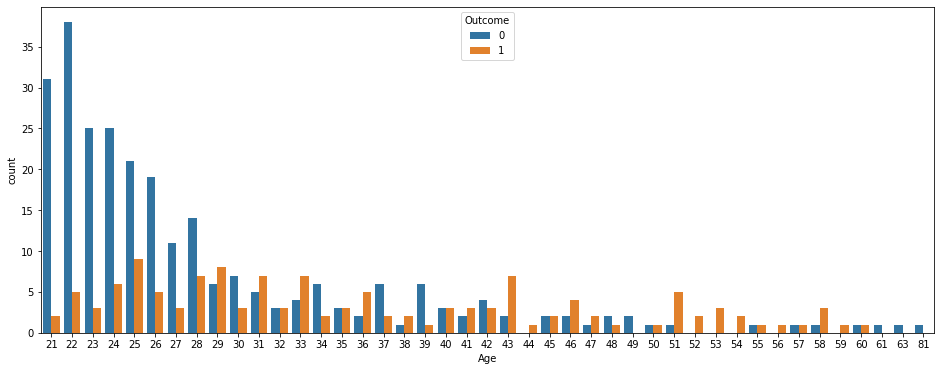

In [328]:
plt.figure(figsize=(16,6))
plt.subplot(), sns.countplot(x= 'Age', hue= 'Outcome', data=df_clean)


________

#### <center>Visualisation sur df_median</center>

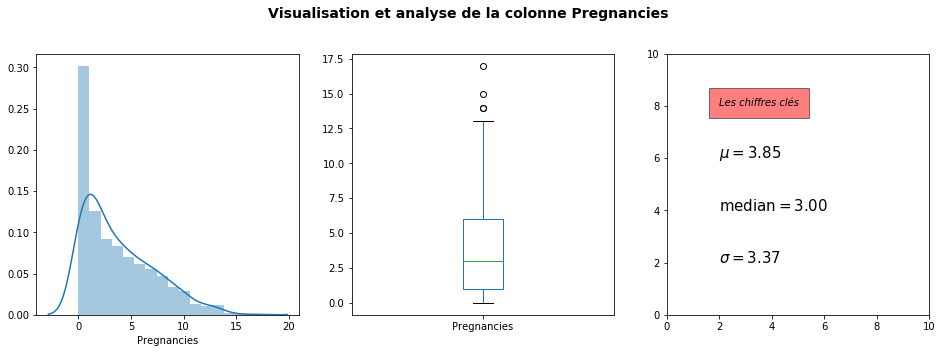

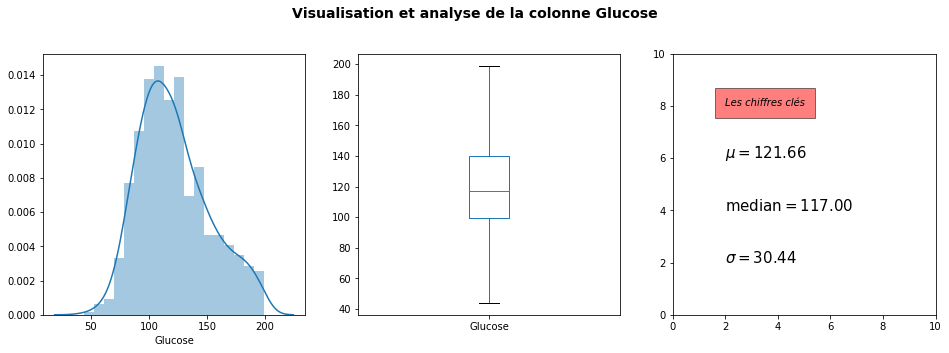

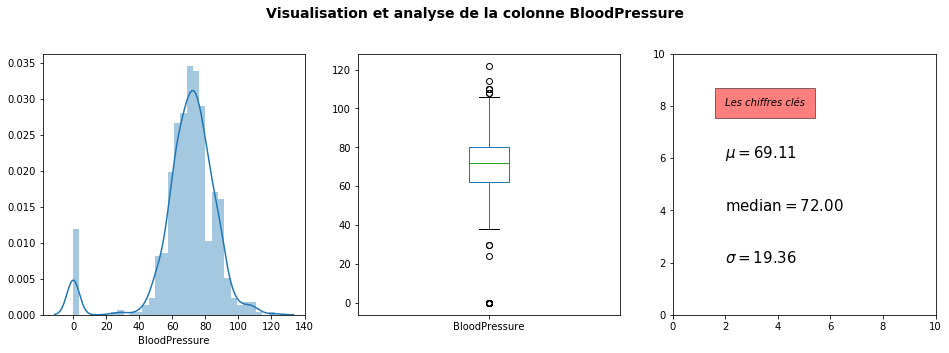

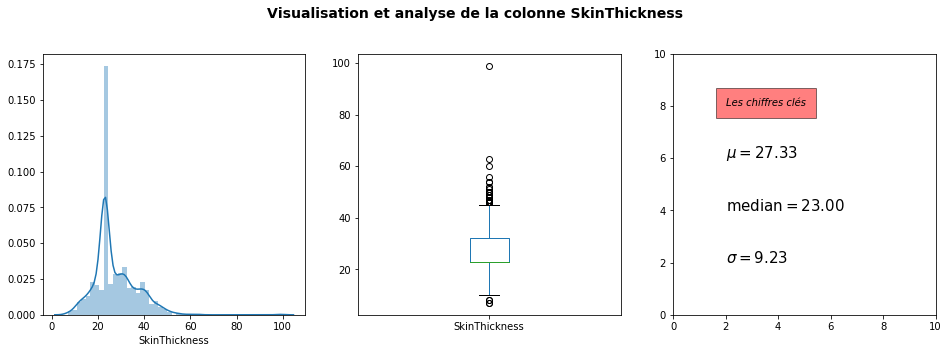

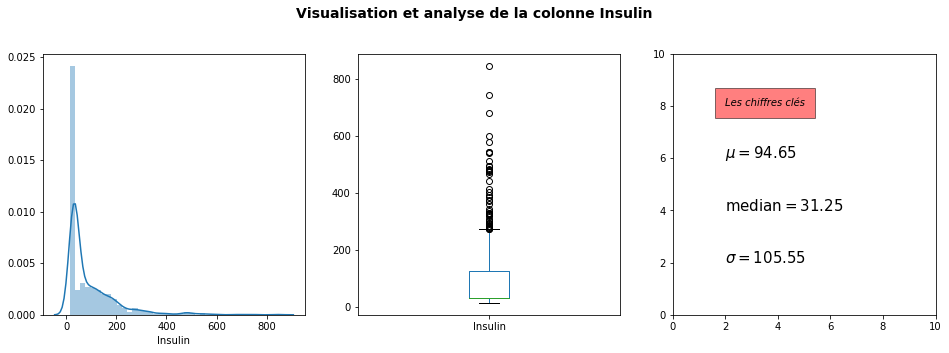

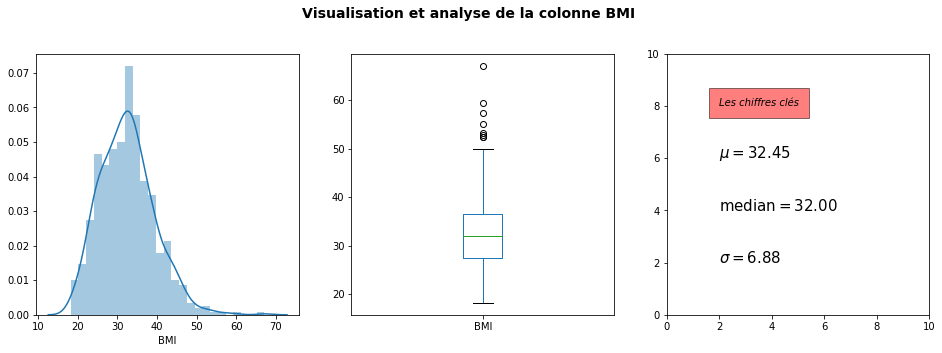

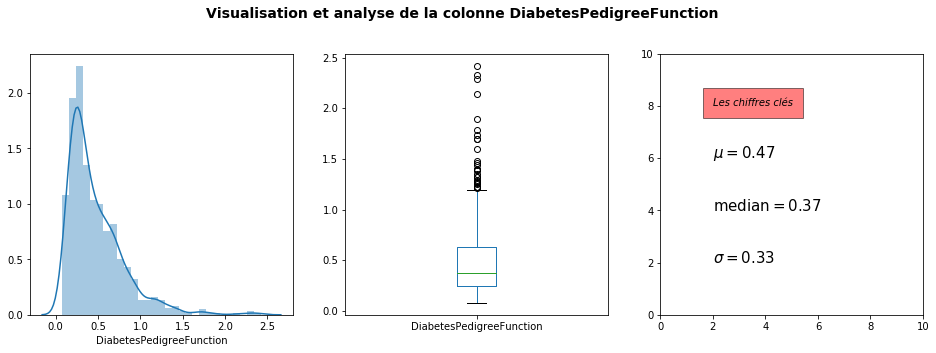

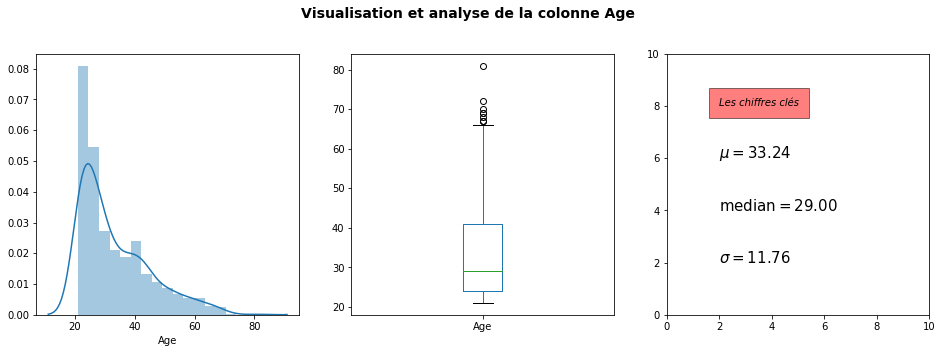

In [329]:
tripleviz(df_median)

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


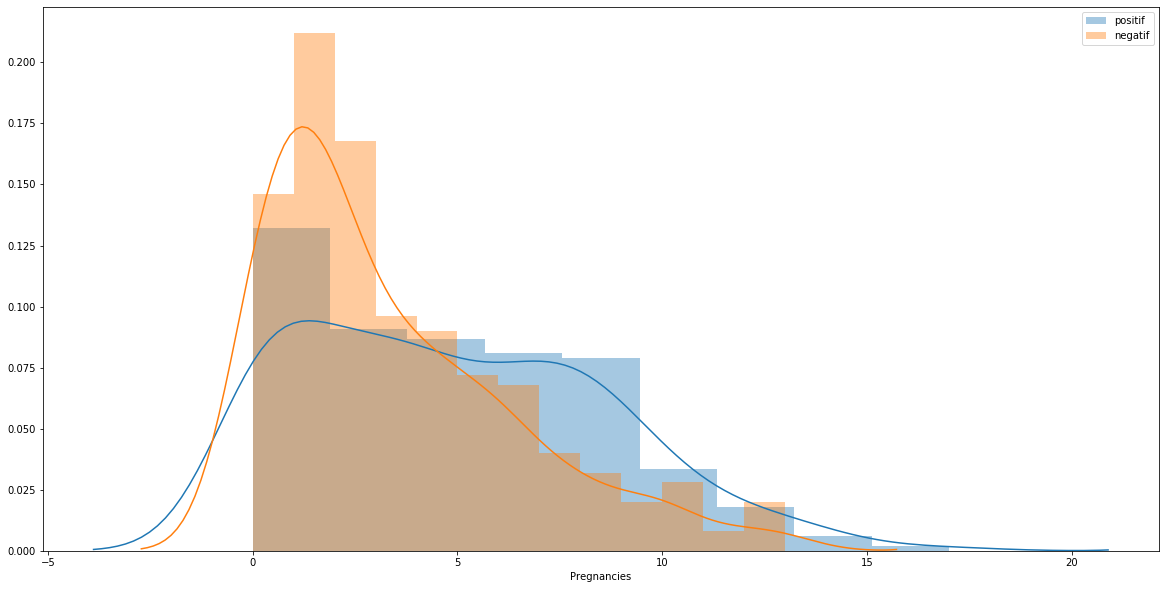

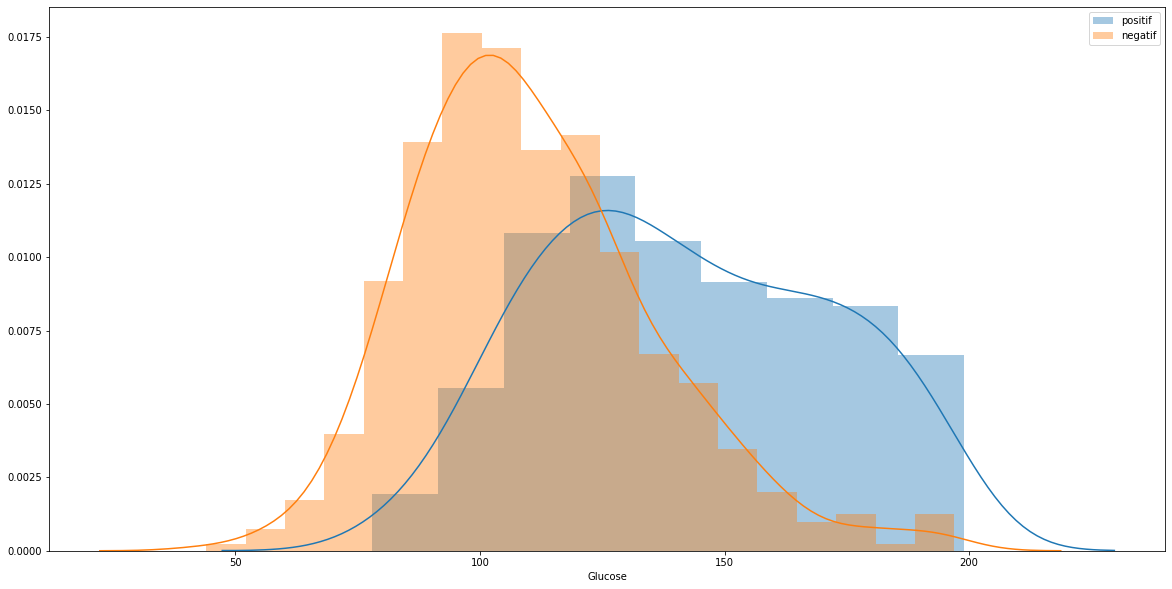

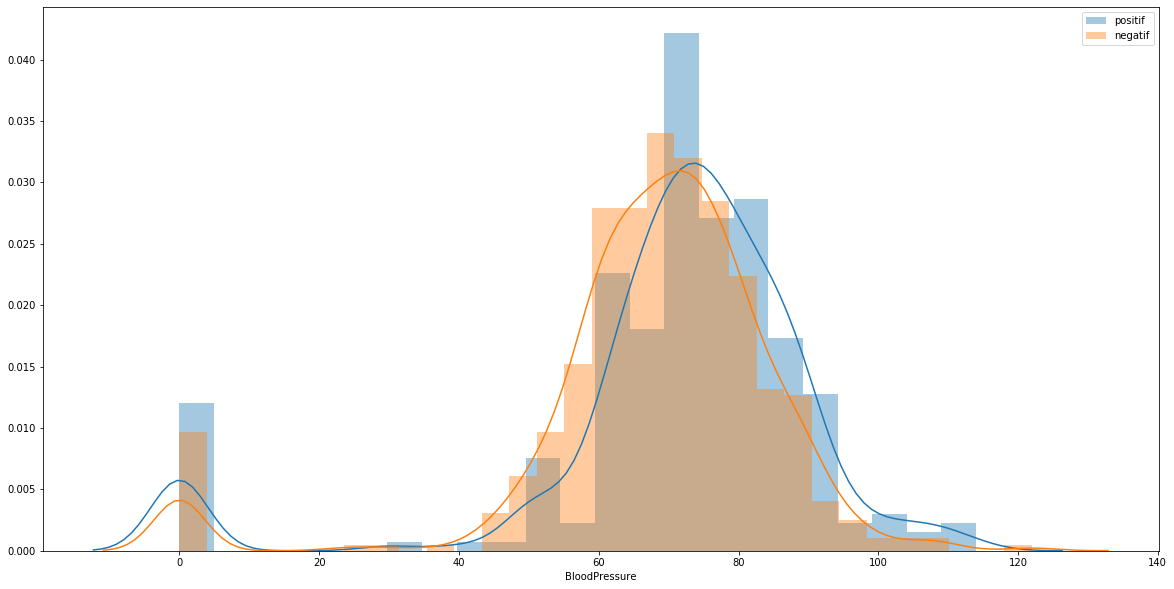

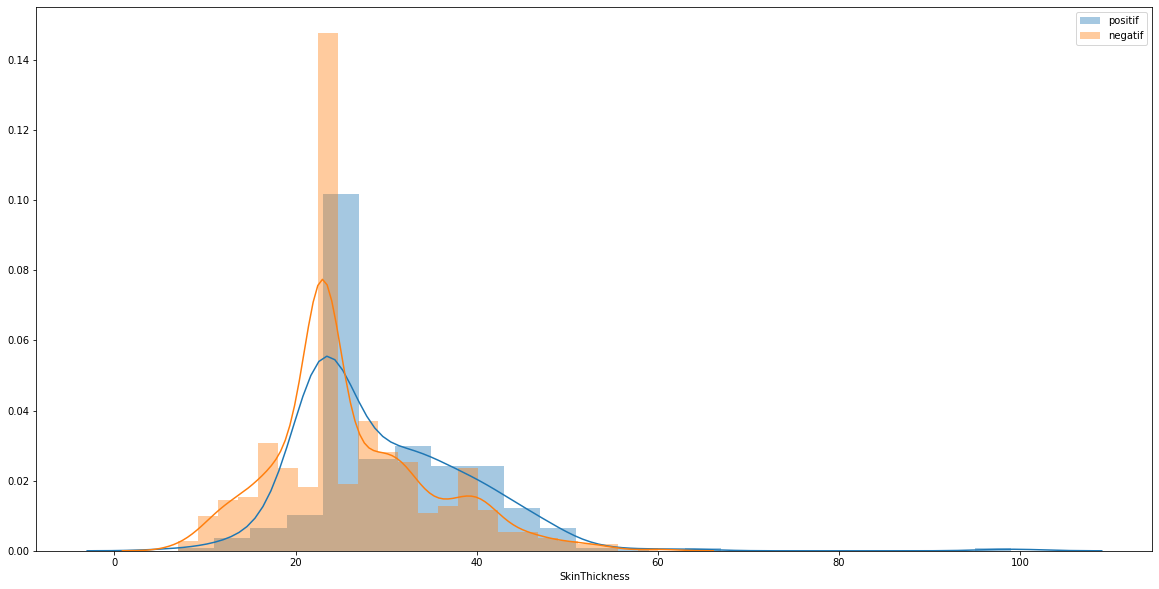

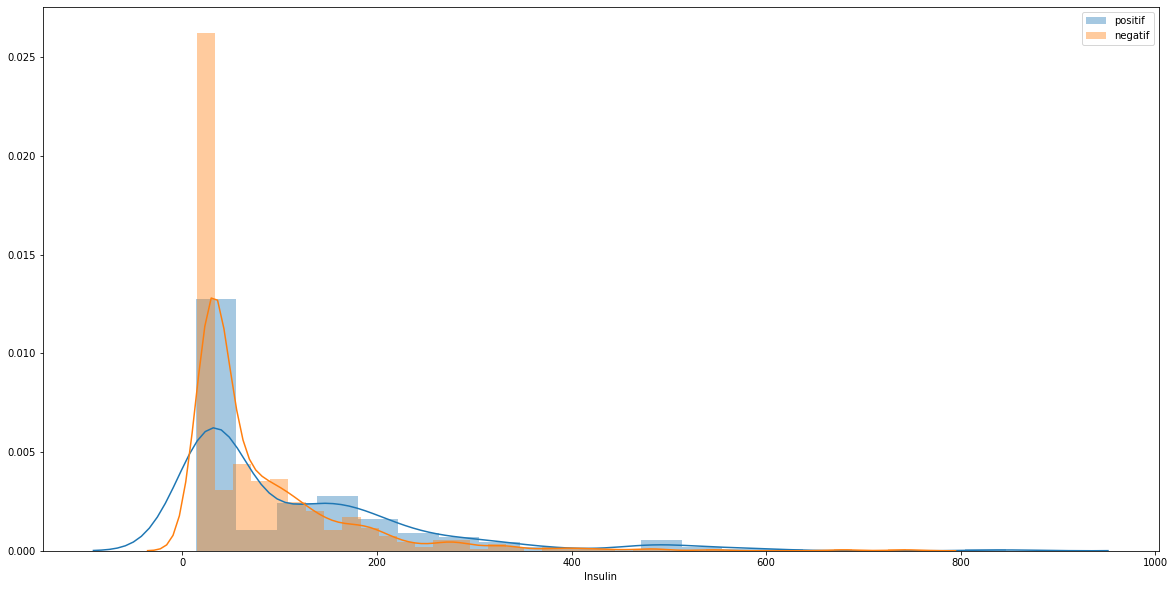

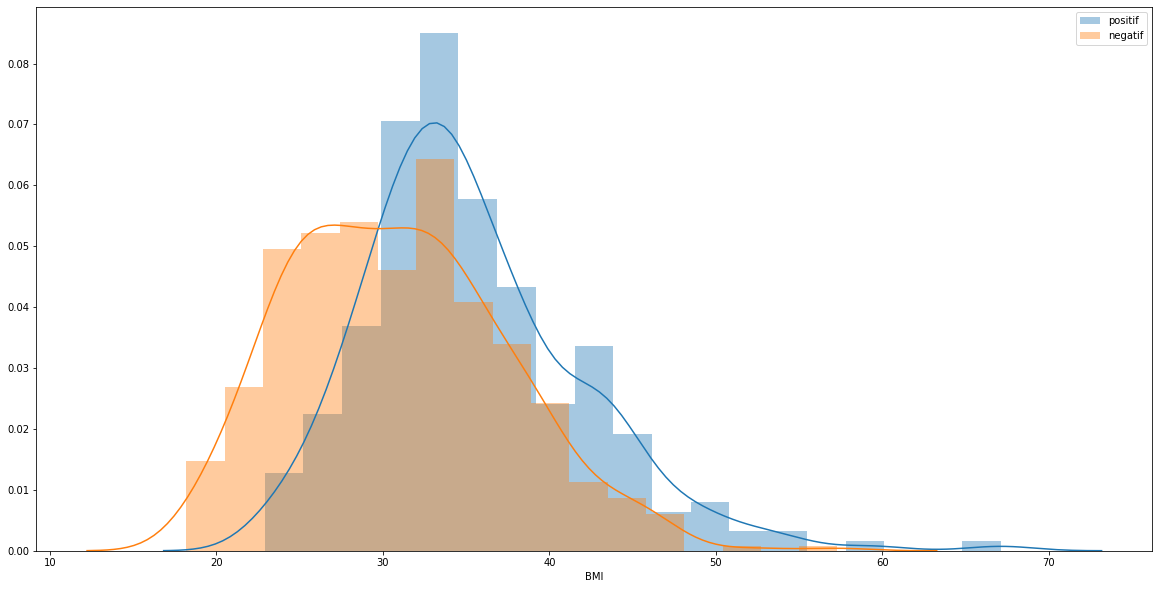

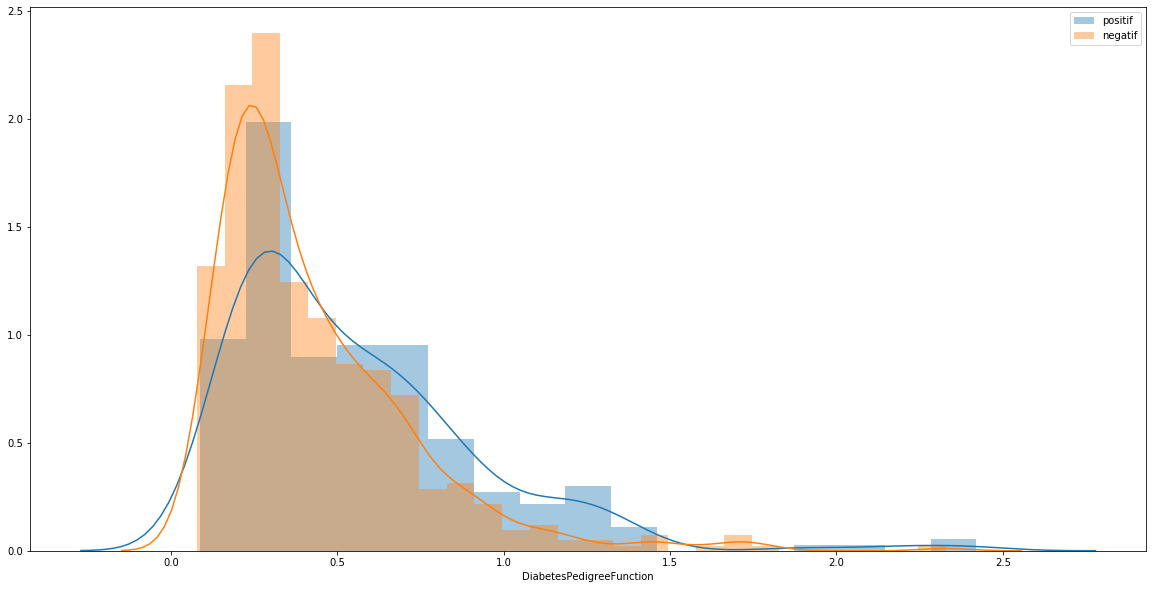

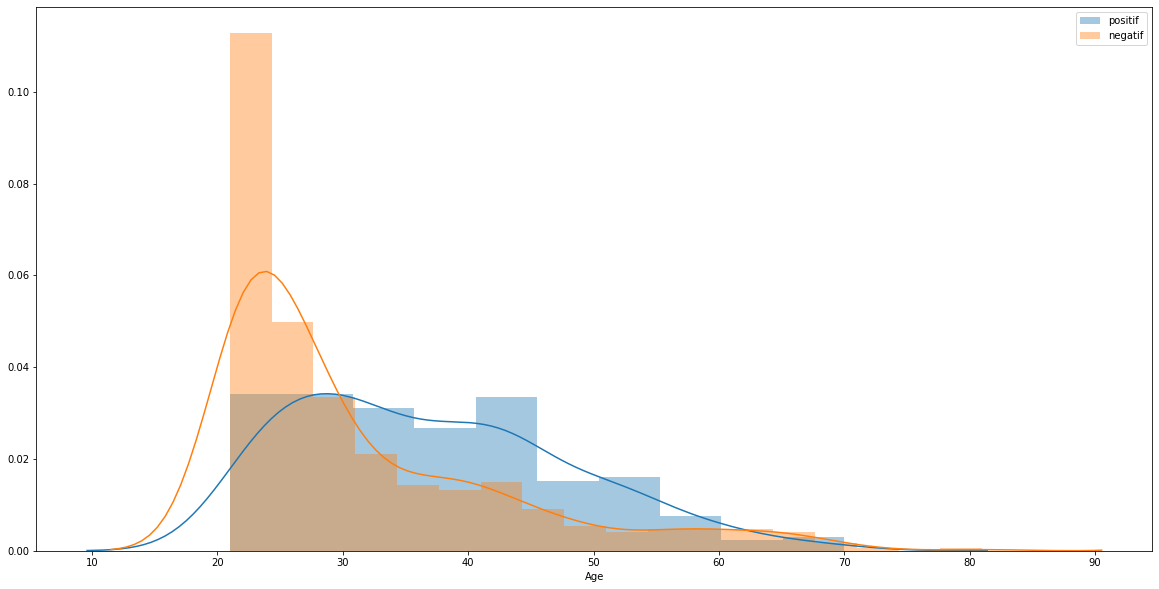

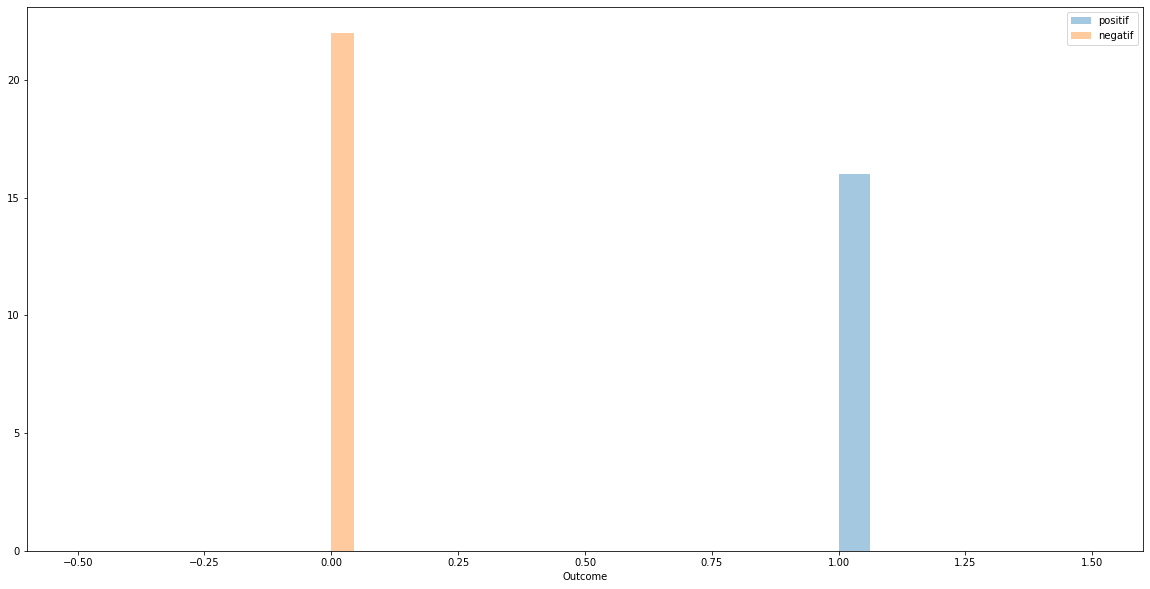

In [330]:
viz_output(df_median)

(<matplotlib.axes._subplots.AxesSubplot at 0x1992e4d8ec8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1992e4d8ec8>)

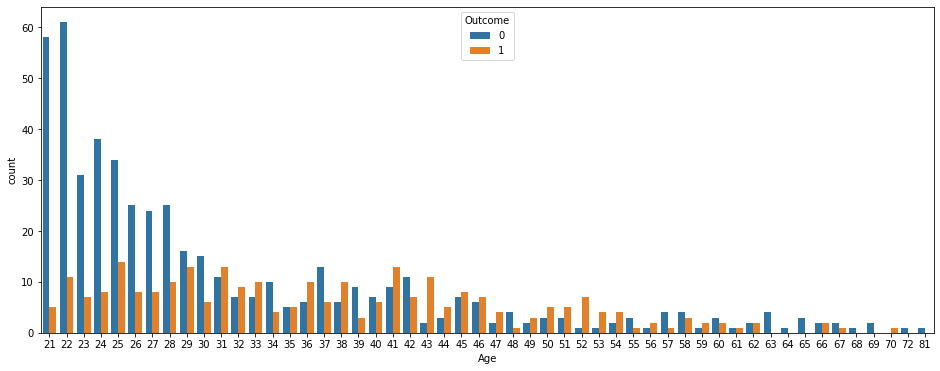

In [331]:
plt.figure(figsize=(16,6))
plt.subplot(), sns.countplot(x= 'Age', hue= 'Outcome', data=df_median)

___________

#### <center>Etude Machine Learning </center>

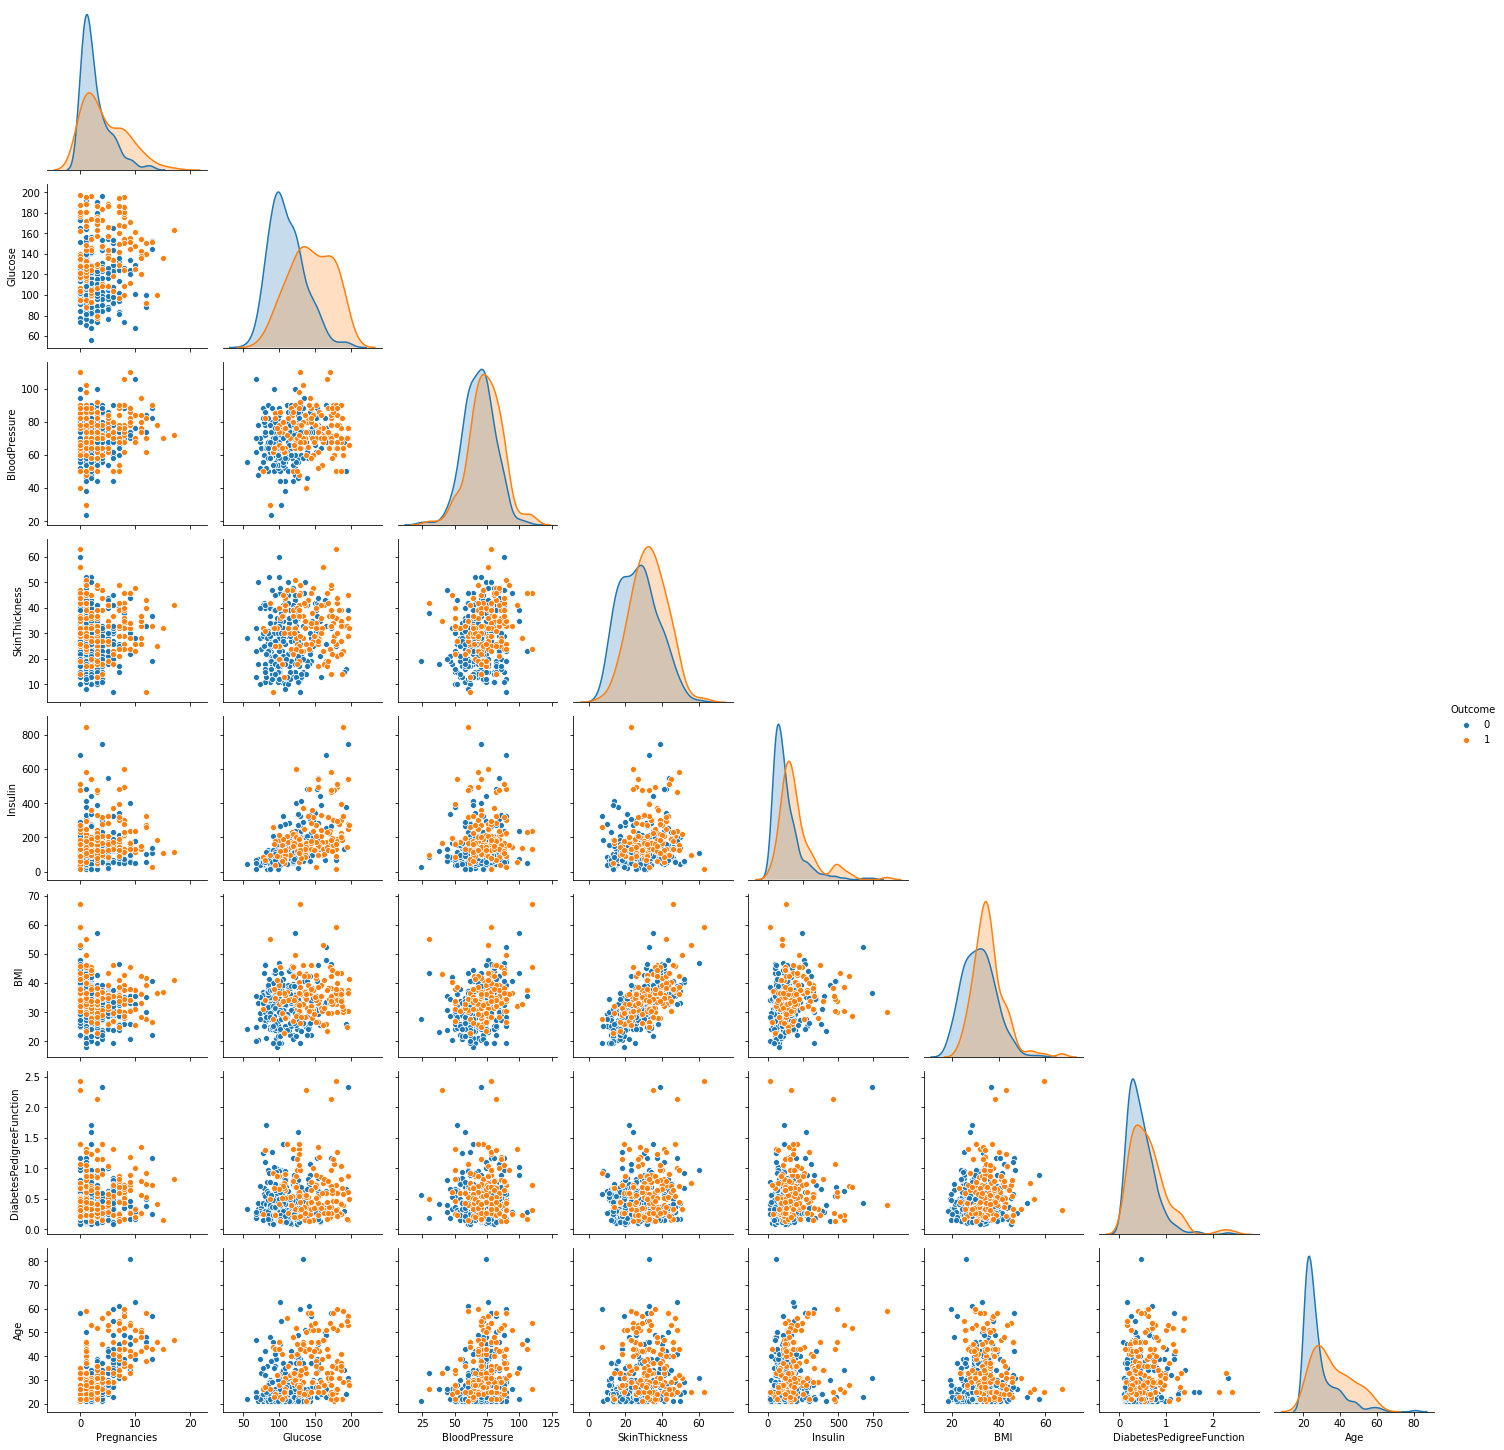

In [332]:
sns.pairplot(df_clean, corner=True, hue='Outcome')

In [333]:
#Importation des différentes librairies
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as score
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, classification_report    

In [334]:
#Préparer un tableau avec tous les algorithmesmodels


In [487]:
def data_target(dataframe, dict_result, models, a, b):
    
    counter = 0

    for i in models:
        
        X = dataframe.iloc[:, 0: -1]
        y = dataframe.iloc[:, -1]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

        i.fit(X_train, y_train)
        y_pred = i.predict(X_test)

        y[y == 1] = "Diabètique"
        y[y == 0] = "Non Diabètique"
        
        print ("\n\n", '≡'*18, "Etude diabète avec model : ",i, '≡'*18, "\n")
        report = classification_report(y_test, y_pred)
        print(report)

        dict_result.update({counter : report})
        
        
#        if (counter == 0):
#            plt.figure(figsize=(30,20))
#            tree.plot_tree(i, filled=True, rounded = True,proportion=True,feature_names= X.columns,class_names=y.values)
#            plt.show()
        
    
        feature_imp = pd.Series(i.feature_importances_,index=X.columns).sort_values(ascending=False)
        print(feature_imp)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Feature Importance Score')
        plt.ylabel('Features')
        plt.title("Visualizing Important Features")
        plt.legend()
        plt.show()
              
        plot_confusion_matrix(i, X_test, y_test)
        plt.show()

C:\Users\utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()




 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Etude diabète avec model :  RandomForestClassifier() ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

                precision    recall  f1-score   support

    Diabètique       0.67      0.64      0.65        47
Non Diabètique       0.84      0.86      0.85       107

      accuracy                           0.79       154
     macro avg       0.76      0.75      0.75       154
  weighted avg       0.79      0.79      0.79       154

Glucose                     0.265196
BMI                         0.156975
Age                         0.147774
DiabetesPedigreeFunction    0.122067
BloodPressure               0.082061
Pregnancies                 0.080252
Insulin                     0.072998
SkinThickness               0.072676
dtype: float64


No handles with labels found to put in legend.


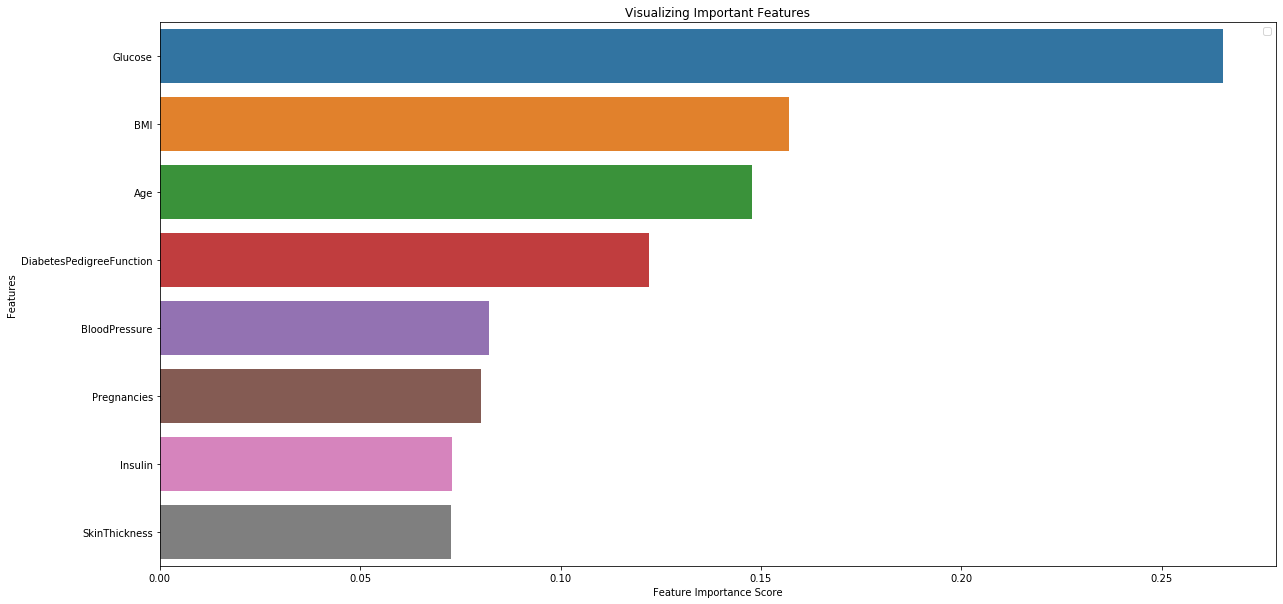

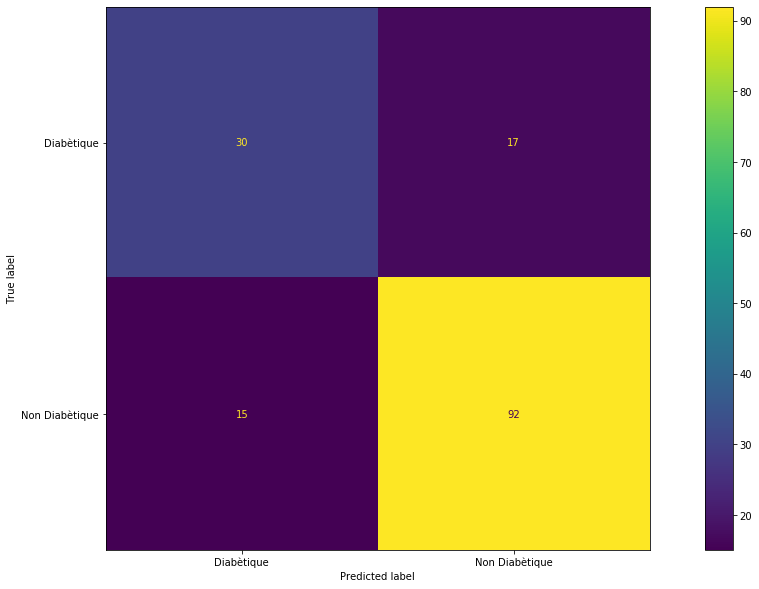

C:\Users\utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()




 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Etude diabète avec model :  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

                precision    recall  f1-score   support

    Diabètique       0.71      0.77      0.73        47
Non Diabètique       0.89      0.86      0.88       107

      accuracy                           0.83       154
     macro avg       0.80      0.81      0.81       154
  weighted avg       0.84      0.83      0.83       154

Glucose 

No handles with labels found to put in legend.


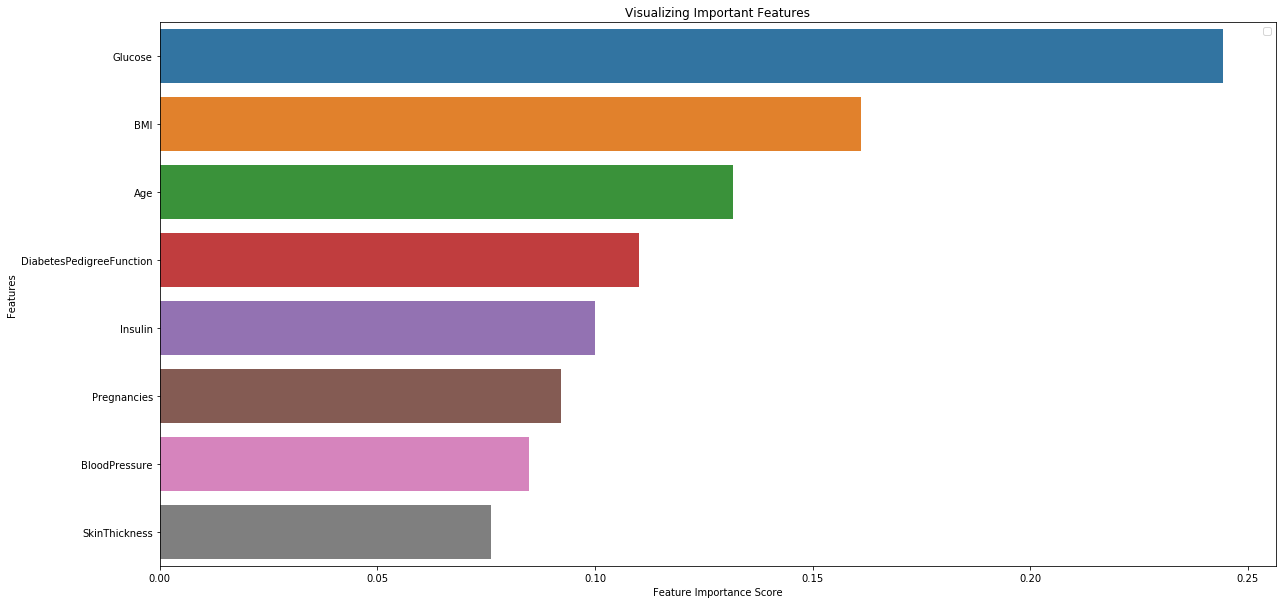

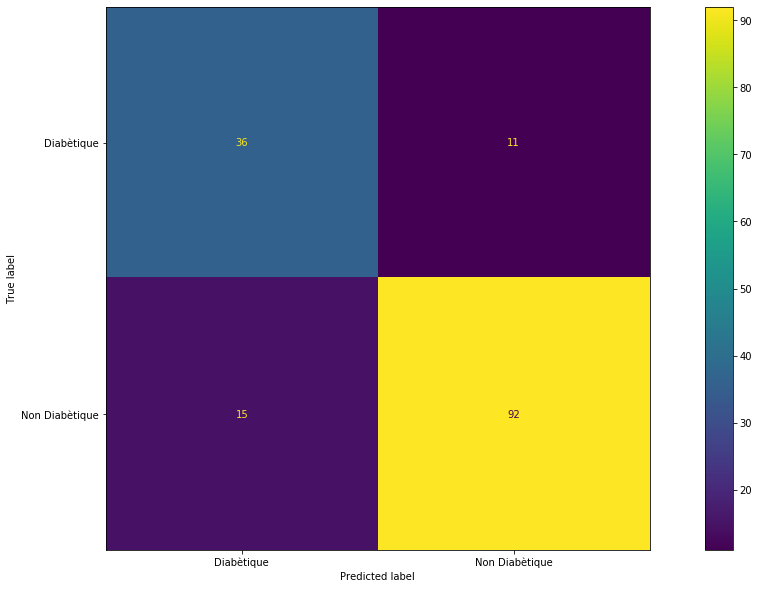

C:\Users\utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()




 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Etude diabète avec model :  DecisionTreeClassifier(max_depth=2, random_state=0) ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

                precision    recall  f1-score   support

    Diabètique       0.63      0.51      0.56        47
Non Diabètique       0.80      0.87      0.83       107

      accuracy                           0.76       154
     macro avg       0.72      0.69      0.70       154
  weighted avg       0.75      0.76      0.75       154

Glucose                     0.680666
BMI                         0.203096
Age                         0.116238
DiabetesPedigreeFunction    0.000000
Insulin                     0.000000
SkinThickness               0.000000
BloodPressure               0.000000
Pregnancies                 0.000000
dtype: float64


No handles with labels found to put in legend.


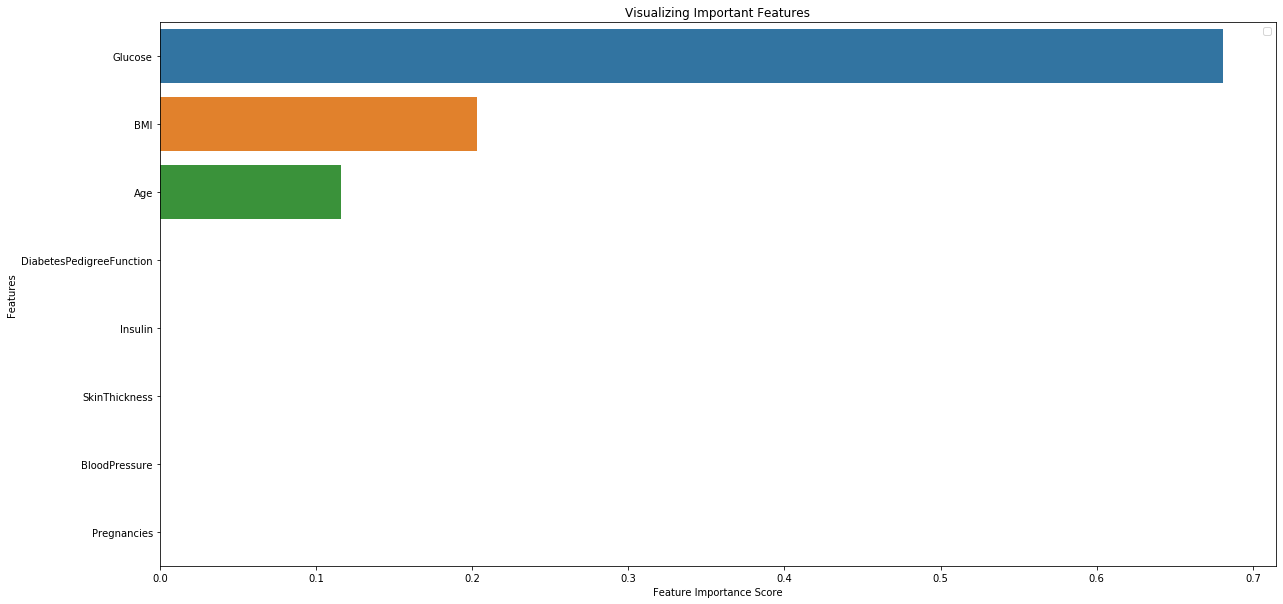

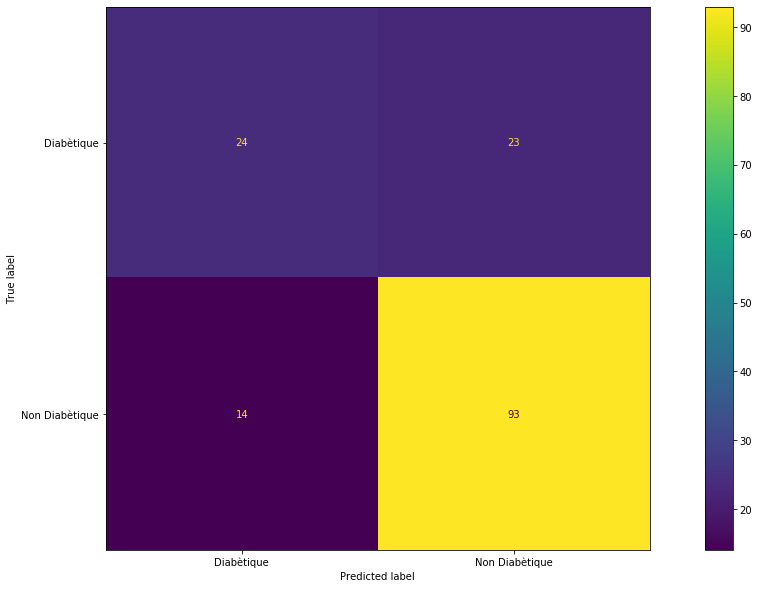

In [488]:
from xgboost import plot_tree
models = { RandomForestClassifier(), DecisionTreeClassifier(criterion = 'gini', random_state = 0,max_depth=2), XGBClassifier()}
dic_resultats = {}
data_target(df_median, dic_resultats, models)

In [337]:
i = 0
while(i <= len(models)-1):
    print(dic_resultats[i])
    i +=1

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       107
           1       0.66      0.57      0.61        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       107
           1       0.71      0.77      0.73        47

    accuracy                           0.83       154
   macro avg       0.80      0.81      0.81       154
weighted avg       0.84      0.83      0.83       154

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       107
           1       0.63      0.70      0.67        47

    accuracy                           0.79       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.79      0.79      0.79       154

              preci

## Analyse en composantes principales
Cette phase de l'analyse permet de mieux comprendre la structure de corrélation des variables afin de d'appréhender ce que seront les grandes classes de comportement des clients.

In [395]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# définition de la commande

def fit_pca(dataframe):
    
    pca = PCA()
    # Sélection des variables quantitatives
    dat=dataframe[["Pregnancies",  "Glucose",  "BloodPressure",  "SkinThickness",  "Insulin", "BMI", "DiabetesPedigreeFunction",  "Age"]]
    # réduction
    data = pd.DataFrame(scale(dat),columns=dat.columns)
    # composantes principales
    C = pca.fit(data).transform(data)
    
    
    
    plt.figure()
    plt.title('Eboulis des valeurs propres', fontsize=14, fontweight='bold')
    plt.plot(pca.explained_variance_ratio_)
    plt.show()
    
    
    plt.figure()
    plt.title('Diagrammes boîte des composantes principales', fontsize=14, fontweight='bold')
    plt.boxplot(C[:,0::])
    plt.show()
    
    plt.figure(figsize=(10,8))
    plt.title('Représentation des individus', fontsize=14, fontweight='bold')
    for i, j, nom in zip(C[:,0], C[:,1], dataframe['Outcome']):
        color = "red" if nom == 0 else "blue"
        plt.text(i, j, nom, color=color)
    plt.axis((-6,7.5,-5,6))  
    plt.show()
    

        
    # coordonnées des variables
    coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
    coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
    fig = plt.figure(figsize=(8,8))
    plt.title('Variables et cercle des corrélations', fontsize=14, fontweight='bold')
    ax = fig.add_subplot(1, 1, 1)
    for i, j, nom in zip(coord1,coord2, data.columns):
        plt.text(i, j, nom)
        plt.arrow(0,0,i,j,color='r')
    plt.axis((-1.2,1.2,-1.2,1.2))
    # cercle
    c=plt.Circle((0,0), radius=1, color='b', fill=False)
    ax.add_patch(c)
    plt.show()
    
    
    from scipy.cluster.hierarchy import dendrogram, linkage
    Z = linkage(df_clean.T, 'ward')
    plt.figure(figsize=(15, 8))
    plt.title('Hierarchical Clustering Dendrogram', fontsize=14, fontweight='bold')
    plt.xlabel('Variable')
    plt.ylabel('Distance')
    dendrogram(Z,leaf_font_size=8.,labels=df_clean.columns)
    plt.show()
    
    return C

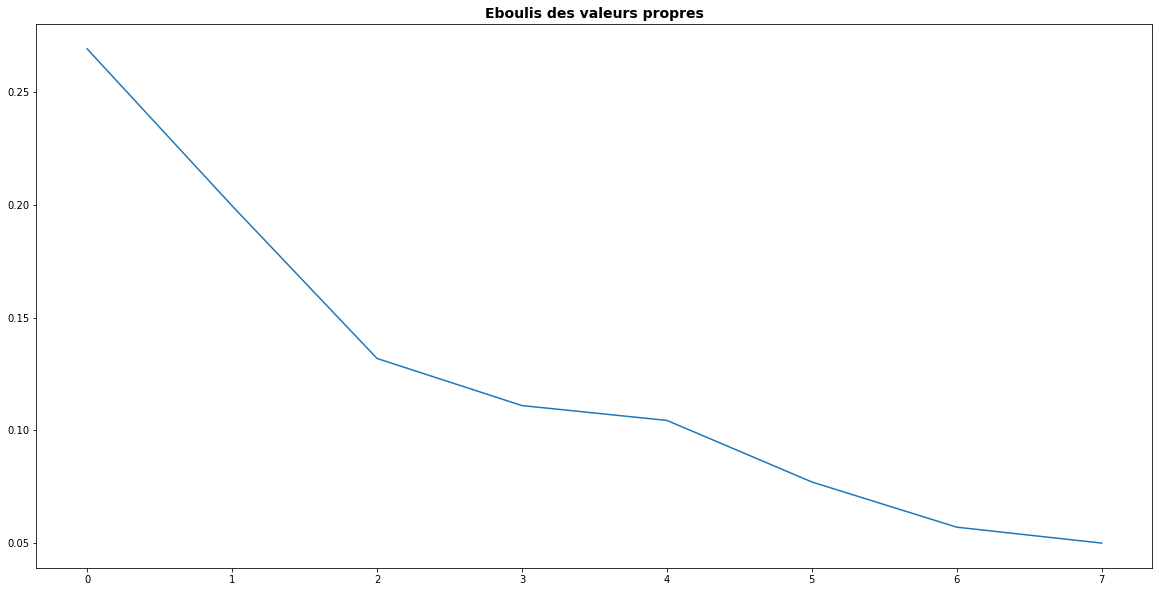

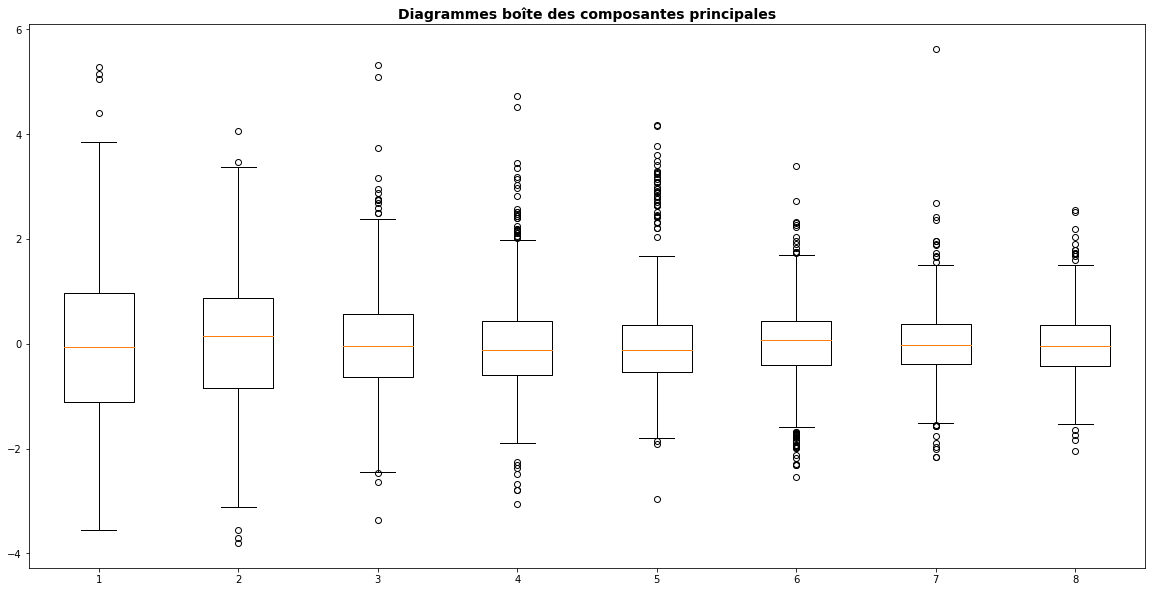

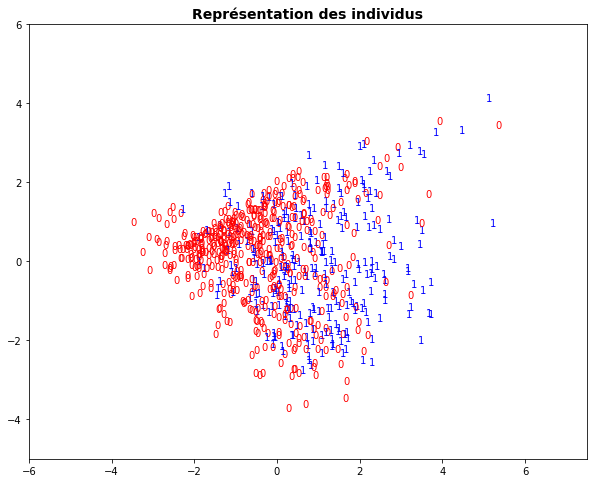

C:\Users\utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


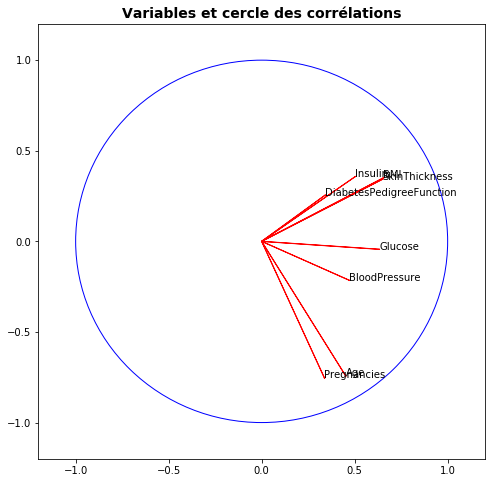

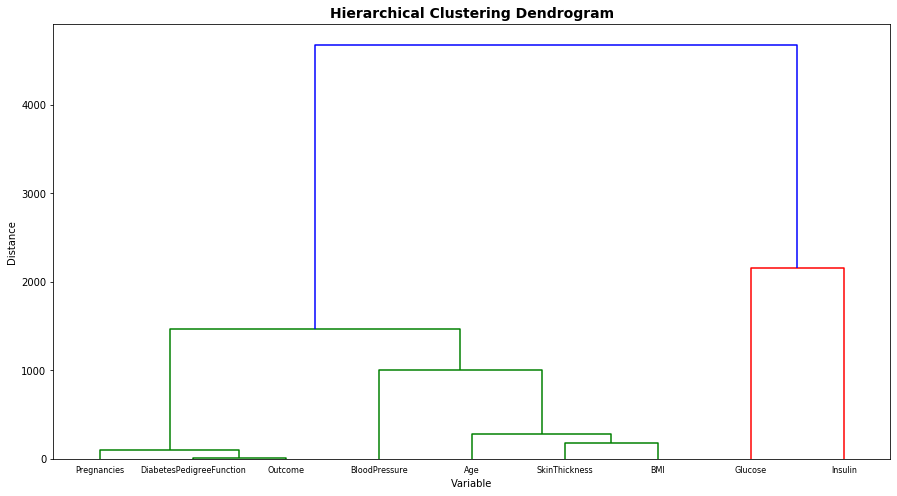

array([[ 1.34889998, -1.07911092, -0.14504857, ..., -0.6475198 ,
         0.77350149, -0.11526952],
       [-1.41431717,  0.25215107, -0.62221531, ...,  0.35414651,
         0.89605553,  0.09132194],
       [ 0.16415601, -1.24475322,  1.58369823, ..., -1.06732842,
        -0.09938656, -1.74343747],
       ...,
       [-0.68330083, -0.53836557,  0.34089287, ...,  0.37995428,
        -0.08479013, -0.45684775],
       [-0.57806656, -0.57700974,  0.21485697, ..., -0.8011756 ,
         0.92102206,  0.96404906],
       [-1.12720577,  0.79762237, -0.95819969, ...,  0.12816097,
         0.42513778, -0.24366647]])

In [396]:
fit_pca(df_median)

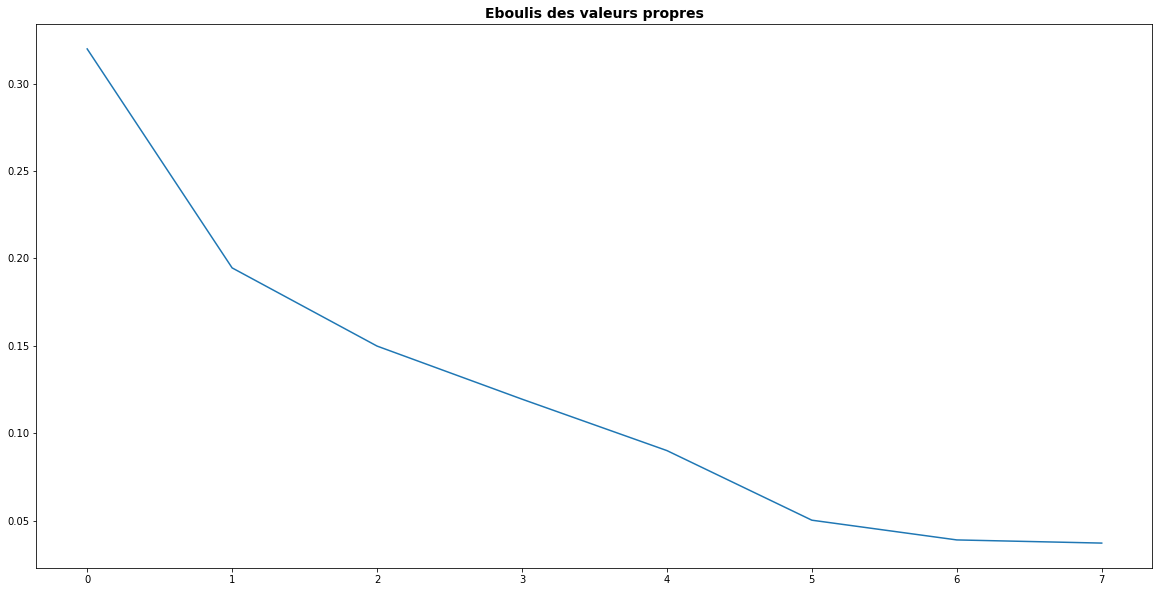

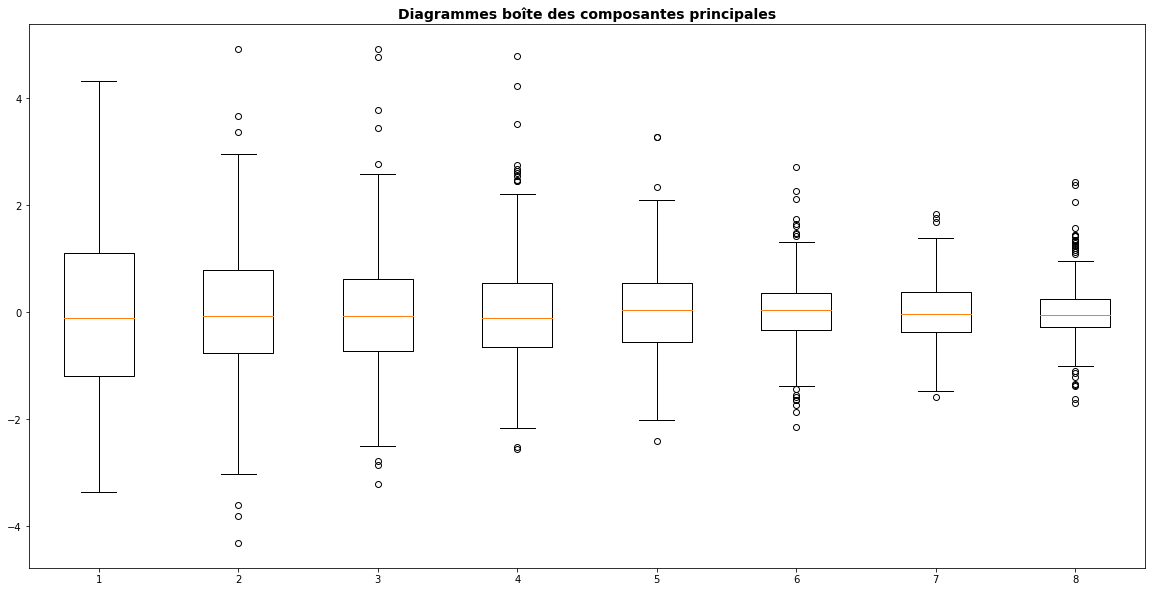

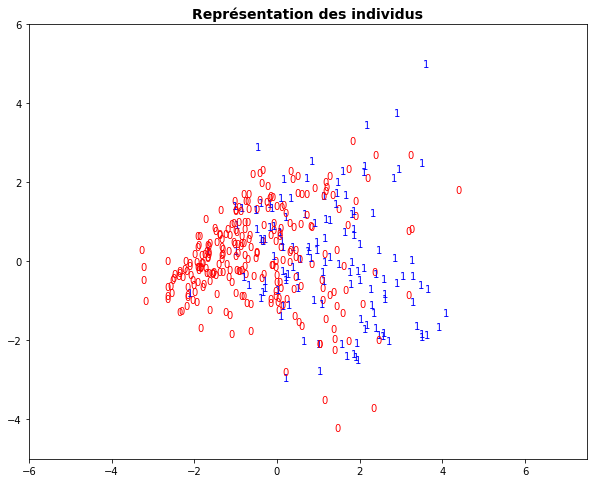

C:\Users\utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


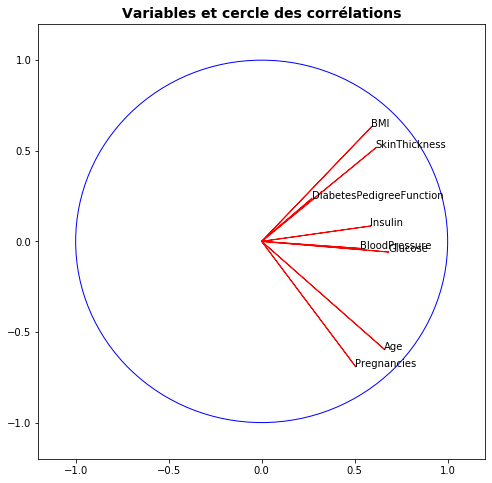

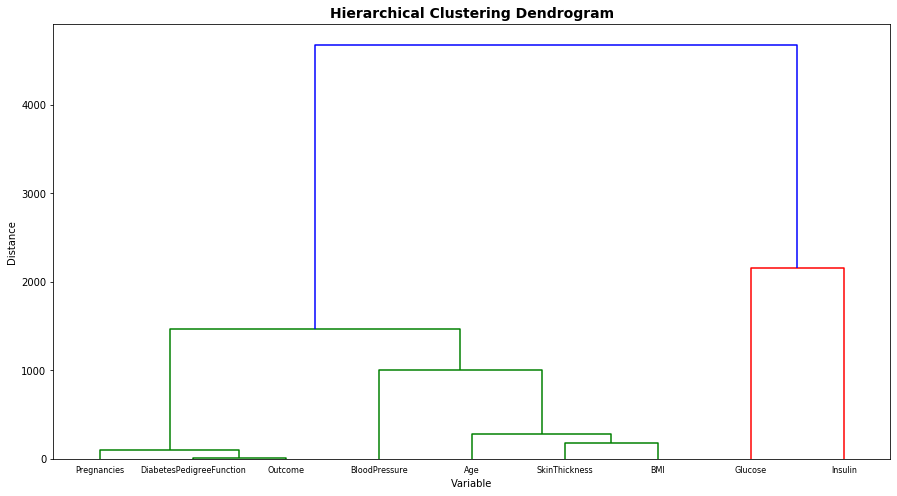

array([[-2.05907699,  0.09037908, -0.30883437, ...,  0.28726044,
        -0.18944149, -0.05020256],
       [ 0.78151938,  2.44246325,  2.21271813, ..., -0.41955344,
         0.79182786,  0.8211172 ],
       [-1.73403355,  0.17195429, -0.50574255, ...,  0.3998171 ,
        -0.18655065,  0.02283049],
       ...,
       [-1.96979281,  0.31476091, -0.18944152, ..., -0.13706275,
        -0.13033289, -0.18550571],
       [ 2.37880523, -2.08677885, -2.00789327, ...,  0.75536069,
        -1.05191867,  0.88310947],
       [-0.71052932, -1.16629825, -0.16601669, ..., -0.17815186,
        -0.18425035, -0.38014309]])

In [397]:
fit_pca(df_clean)